In [1]:
# Point to configuration files
import sys
sys.path.append('/global/cfs/projectdirs/dune/www/data/2x2/simulation/rvizarr_dev/2x2/Thesis_2x2')
# Import python packages required for analysis
from setup import *
# Import CAF Plotting libraries
import plot_manager
importlib.reload(plot_manager)

DUNE plot style enabled


<module 'plot_manager' from '/global/cfs/projectdirs/dune/www/data/2x2/simulation/rvizarr_dev/2x2/Thesis_2x2/plot_manager.py'>

In [31]:
def nu_limit_func(W,energies,theta,M):
    nu_limit_array = []
    for E in energies:
        numerator = W**2 - M**2 + 4*E**2*np.sin(theta/2)**2
        denominator = 2*M + 4*E*np.sin(theta/2)**2
        nu_limit = np.divide(numerator, denominator)
        nu_limit_array.append([nu_limit])
    return nu_limit_array
        
def W_allowed(nus,E,theta,M,W_limit):
    allowed_values = []
    for nu in nus:
        allowed_values.append(M**2 + 2*M*nu -4*E*(E-nu)*np.sin(theta/2)**2 > W_limit)
    return allowed_values

def Q2(E, nu, theta): 
    Q2_array = []
    Q2_array.append(4*E*(E-nu)*np.sin(theta/2)**2)
    return Q2_array
    
def x(Q2, nu, M): 
    x_array = []
    x_array.append(Q2/(2*M*nu))
    return x_array

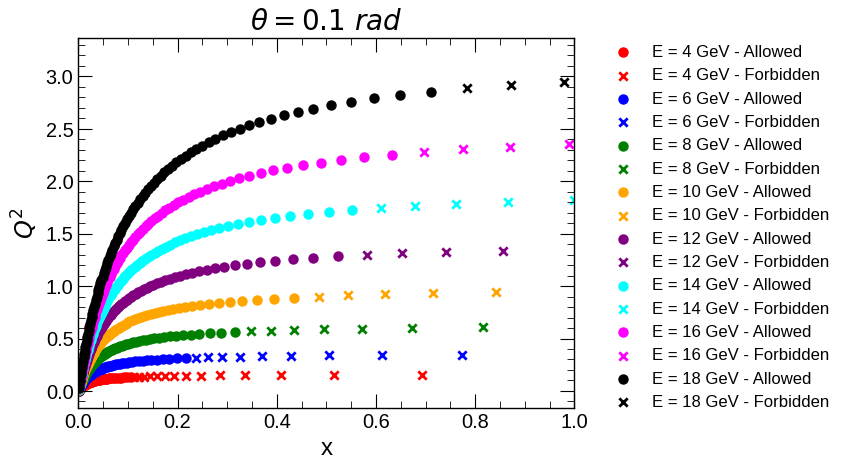

In [49]:
theta1 = 0.1
E_values = np.arange(4,20,2)
fig1, ax1 = plt.subplots()
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'black', 'white']

for E, color in zip(E_values,colors):
    Q2_allowed, x_allowed = [], []
    Q2_not_allowed, x_not_allowed = [], []

    nu_values = np.linspace(0.01 * E, 0.99 * E, 100)
    allowed_values = W_allowed(nu_values,E,theta1,0.938,2)
    for nu, allowed in zip(nu_values, allowed_values):
        Q2_val = Q2(E, nu, theta1)
        x_val = x(Q2_val, nu, 0.938)
        if allowed:
            Q2_allowed.append(Q2_val)
            x_allowed.append(x_val)
        else:
            Q2_not_allowed.append(Q2_val)
            x_not_allowed.append(x_val)
    
    label_allowed = "E = " + str(E) + " GeV - Allowed"
    label_forbidden = "E = " + str(E) + " GeV - Forbidden"
    ax1.scatter(x_allowed, Q2_allowed, color=color, label=label_allowed)
    ax1.scatter(x_not_allowed, Q2_not_allowed, color=color, marker='x', label=label_forbidden)
    
ax1.set_xlabel('x')
ax1.set_ylabel(r'$Q^2$')
ax1.set_xlim(0, 1)
ax1.set_title(r'$\theta = 0.1\ rad$', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

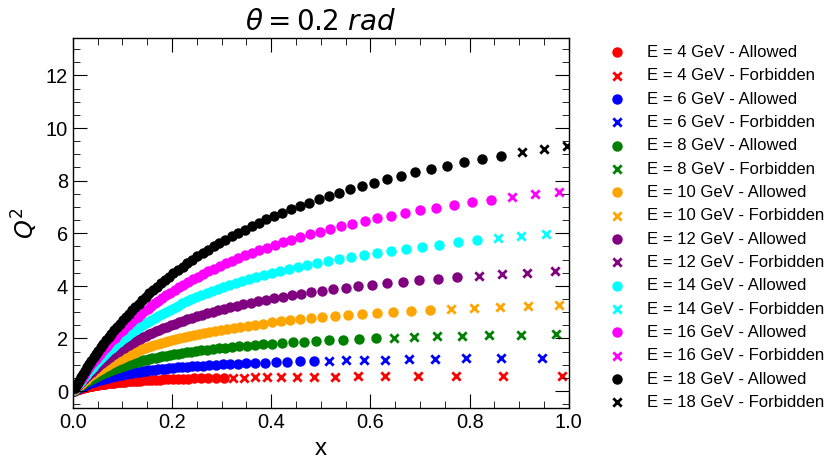

In [48]:
theta1 = 0.2
E_values = np.arange(4,20,2)
fig1, ax1 = plt.subplots()
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'black', 'white']

for E, color in zip(E_values,colors):
    Q2_allowed, x_allowed = [], []
    Q2_not_allowed, x_not_allowed = [], []

    nu_values = np.linspace(0.01 * E, 0.99 * E, 100)
    allowed_values = W_allowed(nu_values,E,theta1,0.938,2)
    for nu, allowed in zip(nu_values, allowed_values):
        Q2_val = Q2(E, nu, theta1)
        x_val = x(Q2_val, nu, 0.938)
        if allowed:
            Q2_allowed.append(Q2_val)
            x_allowed.append(x_val)
        else:
            Q2_not_allowed.append(Q2_val)
            x_not_allowed.append(x_val)
    
    label_allowed = "E = " + str(E) + " GeV - Allowed"
    label_forbidden = "E = " + str(E) + " GeV - Forbidden"
    ax1.scatter(x_allowed, Q2_allowed, color=color, label=label_allowed)
    ax1.scatter(x_not_allowed, Q2_not_allowed, color=color, marker='x', label=label_forbidden)
    
ax1.set_xlabel('x')
ax1.set_ylabel(r'$Q^2$')
ax1.set_xlim(0, 1)
ax1.set_title(r'$\theta = 0.2\ rad$', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)